## Linear Regression model prediction
$$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\dots+\theta_{n}x_{n}$$
In this equation:
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_{i}$ is the $i^{\text{th}}$ feature value
- $\theta_{j}$ is the $j^{\text{th}}$ model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}$, $\theta_{2}$, $\dots$,$\theta_{n}$)

This equation can be written much more concisely using a vectorized form
$$\hat{y}=h_{\theta}(x)=\theta \cdot x$$
In this equation:
- $\theta$ is the model's *parameter vector*, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$
- $x$ is the instance's *feature vector*, containing $x_{0}$ to $x_{n}$ with $x_{0}$ always equal to 1
- $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$ which is of course equal to first equation
- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$


#### MSE cost function for a Linear Regression Model
$$\text{MSE}(X, h_{\theta})=\frac{1}{m}\sum_{i-1}^{m}(\theta^{T}x^{(i)}-y^{(i)})^{2}$$

## The normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution, called the *Normal Equation*
### Normal Equation
$$\hat{\theta}=(X^{T}X)^{-1}X^{T}y$$
In this equation:
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function
- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$


In [44]:
import numpy as np

np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

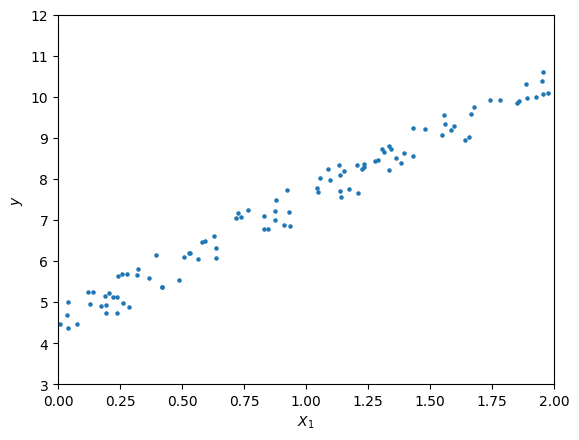

In [45]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=5)
plt.ylabel('$y$')
plt.xlabel('$X_1$')
plt.axis([0, 2, 3, 12])
plt.show()

In [27]:
X_b = np.c_[np.ones((100, 1)), X]

In [31]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [32]:
theta_best

array([[4.55808002],
       [2.96827553]])

In [33]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [35]:
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.55808002],
       [10.49463108]])

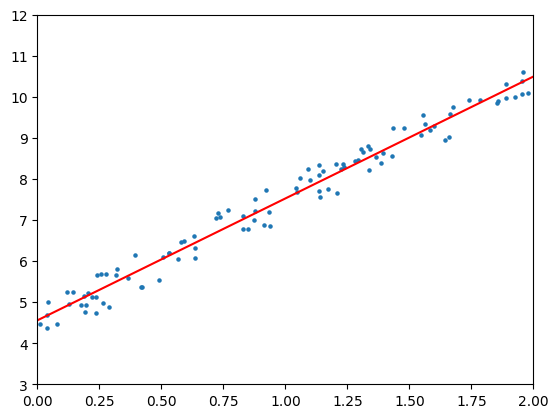

In [38]:
plt.plot(X_new, y_pred, 'r-')
plt.scatter(X, y, s=5)
plt.axis([0, 2, 3, 12])
plt.show()

Or alternatively we can use Scikit-Learn's Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.55808002]), array([[2.96827553]]))

In [41]:
lr.predict(X_new)

array([[ 4.55808002],
       [10.49463108]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function

In [42]:
theta_best_svd, residuals, rand, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.55808002],
       [2.96827553]])

This function computes $\hat{\theta}=X^{\dagger}y$ where $X^{\dagger}$ is the *pseudoinverse* of $X$ (specifically the Moore-Penrose inverse).
You can use `np.linalg.pinv()` to compute the pseudoinverse directly

In [43]:
np.linalg.pinv(X_b).dot(y)

array([[4.55808002],
       [2.96827553]])

## Gradient Descent

#### Partial derivatives of the cost function

$$\frac{\delta}{\delta\theta_{j}}\text{MSE}(\theta)=\frac{2}{m}\sum_{i-1}^{m}(\theta^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$$

Instead of computing these partial derivatives individually, we can use equation below to compute them all in one go. The gradient vector, noted $\nabla_{\theta}\text{MSE}(\theta)$, contains all the partial derivatives of the cost function

$$\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
\frac{\partial}{\partial \theta_0} \operatorname{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_1} \operatorname{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_n} \operatorname{MSE}(\boldsymbol{\theta})
\end{pmatrix}
= \frac{2}{m} \mathbf{X}^\top (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

Note: This formula involves calculations over the full training set $X$, at each Gradient Descent step! This is why the algorithms is called *Batch Gradient Descent*: it uses the whole batch of the training data at ever step (Actually, *Full Gradient Descent* would probably be a better name). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decompostion.


Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This is where the learning rate $\eta$ comes into play

$$\theta^{\text{next step}}=\theta - \eta \nabla_{\theta}\text{MSE}(\theta)$$

In [46]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)  # random initialization

for i in range(n_iterations):
	gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
	theta = theta - eta * gradients

In [47]:
theta

array([[4.55808002],
       [2.96827553]])

In [50]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
	m = len(X_b)
	plt.scatter(X, y, s=5)
	n_iterations = 1000
	for i in range(n_iterations):
		if i < 10:
			y_pred = X_new_b.dot(theta)
			style = "b-" if i > 0 else "r--"
			plt.plot(X_new, y_pred, style)
		gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
		theta = theta - eta * gradients
		if theta_path is not None:
			theta_path.append(theta)
	plt.xlabel('$x_1$')
	plt.ylabel('$y$')
	plt.title(r"$\eta = {}$".format(eta), fontsize=16)

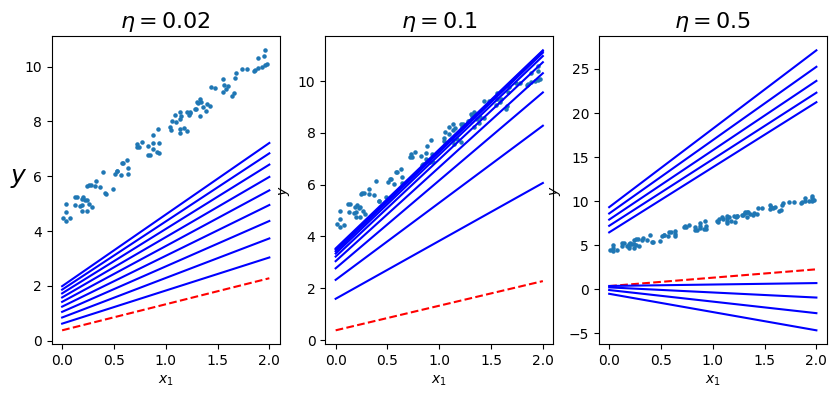

In [51]:
np.random.seed(42)
theta = np.random.rand(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()


### Stochastic Gradient Descent

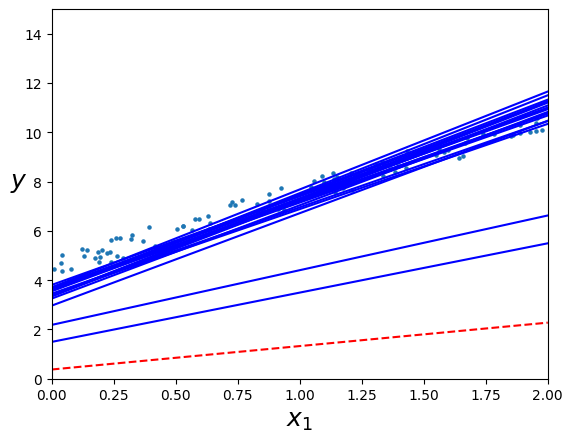

In [53]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epoch = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
	return t0 / (t + t1)


theta = np.random.rand(2, 1)

for epoch in range(n_epoch):
	for i in range(m):
		if epoch == 0 and i < 20:
			y_pred = X_new_b.dot(theta)
			style = 'b-' if i > 0 else "r--"
			plt.plot(X_new, y_pred, style)
		random_index = np.random.randint(m)
		xi = X_b[random_index:random_index + 1]
		yi = y[random_index: random_index + 1]
		gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
		eta = learning_schedule(epoch * m + i)
		theta = theta - eta * gradients
		theta_path_sgd.append(theta)

plt.scatter(X, y, s=5)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


In [54]:
theta

array([[4.54640559],
       [2.97834462]])

Or equivalently we can use Scikit-learn's `SGDRegressor`

In [55]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [56]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51036403]), array([2.95063758]))

## Mini-batch Gradient Descent

In [59]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2, 1)
t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
	shuffled_indices = np.random.permutation(m)
	X_b_shuffled = X_b[shuffled_indices]
	y_shuffled = y[shuffled_indices]

	for i in range(0, m, minibatch_size):
		t += 1
		xi = X_b_shuffled[i:i + minibatch_size]
		yi = y_shuffled[i:i + minibatch_size]
		gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
		eta = learning_schedule(t)
		theta = theta - eta * gradients
		theta_path_mgd.append(theta)

In [60]:
theta

array([[4.56803997],
       [2.97916477]])

In [62]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

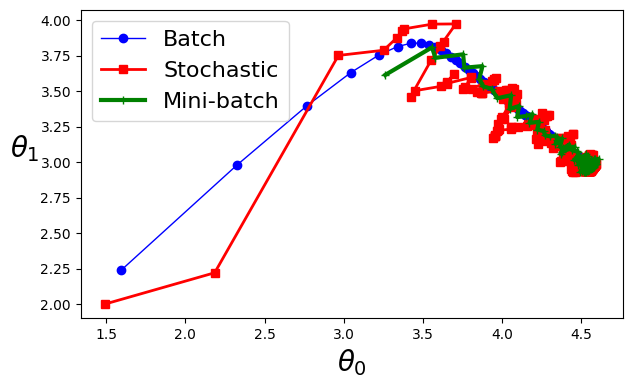

In [67]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=2, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=3, label="Mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()

| Algorithm         | Large `m` | Out-of-core Support | Large `n` | Hyperparams | Scaling Required | Scikit-Learn       |
|------------------|-----------|----------------------|-----------|--------------|------------------|--------------------|
| Normal Equation  | Fast      | No                   | Slow      | 0            | No               | N/A                |
| SVD              | Fast      | No                   | Slow      | 0            | No               | `LinearRegression` |
| Batch GD         | Slow      | No                   | Fast      | 2            | Yes              | `SGDRegressor`     |
| Stochastic GD    | Fast      | Yes                  | Fast      | ≥2           | Yes              | `SGDRegressor`     |
| Mini-batch GD    | Fast      | Yes                  | Fast      | ≥2           | Yes              | `SGDRegressor`     |
